<a href="https://colab.research.google.com/github/canalesluciac/exam-score-prediction/blob/main/ProyectoParteIII_Canales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📝🎓Exam Score Prediction**

Project: Exam Score Prediction  
Name: Canales, Lucía Constanza  
Course: *Data Science I: Introducción a Python y sus librerias* | Company: Coderhouse  
Submission date: February 19, 2026

##📑 Table of Contents
1. [✍🏻 Abstract](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=T9F-KhZ2UNus&line=1&uniqifier=1)
1. [📑 Metadata](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=kAQTYG3PKLFc)
1. [🔎 Exploratory Data Analysis (EDA)](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=24EixR2FQgLF)
1. [📊 Visualizations](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=l6KhorUHSYHZ)
1. [🛠️ Feature Engineering & Selection](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=tvDOdN_gAjXb&line=1&uniqifier=1)
1. [🤖 Model Development](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=1ONjuwYaiPoG&line=1&uniqifier=1)
1. [✅️ Model Predictions](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=RBRQWa0qAw0W&line=1&uniqifier=1)
1. [💡 Actionable Recommendations](https://colab.research.google.com/drive/1MXWGCi82etbrGyJ7CFbiv7PxLaEro1GS#scrollTo=9WsYQcYL9A38&line=1&uniqifier=1)
1. [🧠 Conclusions]()

##✍🏻 Abstract

###Project Overview

Machine learning model to predict student exam scores using demographic and behavioral features.

* Dataset: 20,000 student records with 13 features  
* Target: Exam Score prediction (regression)  
* Goal: R² > 0.7, MAE < 10% of score range   

Feature Types
Category |	Count	| Features
---------|--------|-------|
Numeric	| 4	| study_hours, class_attendance, sleep_hours, age
Categorical	| 7	| gender, course, internet_access, sleep_quality, study_method, facility_rating, exam_difficulty
Target	| 1	| exam_score
ID	| 1	| id

###Dataset overview

This dataset provides an extensive and realistic representation of various factors that contribute to student exam performance. It contains 20.000 records, each describing a student’s academic behavior, study habits, lifestyle routines, and exam conditions. The exam score (0–100) is derived using a weighted formula that mimics real-life academic performance patterns. These variables collectively help understand how different aspects of a student’s daily life and learning environment influence their exam outcomes.

The dataset is fully synthetic yet designed to mirror logical and realistic student behavior. It contains no personally identifiable information and is suitable for educational research, statistical exploration, behavior analysis, institution-level studies, and general data-driven insights.

Whether used for visualizing score distributions, comparing study habits, evaluating lifestyle effects, or simply exploring student performance patterns, this dataset provides a well-structured and diverse foundation for understanding exam outcomes.

* Dataset available since November 16, 2025  
* Source: [Exam Score Prediction | Kaggle](https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset/data)

Feature	| Example Values
--------|---------------
Age	| 17-25
Gender	| male, female, other
Course	| b.tech, bba, b.sc, ba, b.com, bca, diploma
Study Hours	| 0-8 hours daily
Class Attendance	| 0-100%
Internet Access	| yes, no
Sleep Hours	| 4-10 hours
Sleep Quality	| poor, average, good
Study Method	| self-study, coaching, online videos, group study, mixed
Facility Rating	| low, medium, high
Exam Difficulty	| easy, moderate, hard

##📑 Metadata

### Objectives and **hypothesis**

#### Main Objective (Business problem)
Predict students' exam scores based on study habits, demographics, and environmental factors. Our goal here is to establish a foundational understanding of the dataset through summary statistics and visualizations.

#### Central Research Question
What factors explain and predict student exam performance, and how can these insights be used to identify students at risk of underachievement?

#### Relevant questions / Goals

###### Business Questions
*   What are the key factors that influence student's academic performance?
*   Can we predict a student's final exam score using behavioral and demographic data?
*   Can we identify students at risk of underperforming before the final exam?
*   Which factors are most actionable for improving academic outcomes?


###### Exploratory Data Analysis (EDA) Questions
*   How do scores vary by gender, attendance to classes, study hours and access to internet?
*   Do study hours show diminishing returns on exam scores?
*   Do attendance moderate the effect of study time on performance?
*   Are there critical tresholds (e.g., minimum attendance) that significantly impact scores?

###### Predictive Modeling Questions
*   How accurately can we predict exam scores using pre-exam features?
*   Which machine learning model performs best for this prediction task?

###### Fairness and Ethical Considerations
*   Does the model exhibit bias across gender or socio-economic groups?
*   Could this model reinforce existing educational inequalities?
*   Which features could introduce indirect discrimination?
*   How can predictions be used responsibly in an educational context?

###### Storytelling Questions
*   Which factors have the strongest impact on exam performance?
*   Which variables are actionable for educators and institutions?
*   What early interventions could be designed based on these insights?
*   What additional data would most improve future predictions?

##🔎 Exploratory Data Analysis (EDA)

#### Import Libraries and Packages

In [1]:
# Core libraries

## Data manipulation and analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing - Scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, TargetEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Advanced Gradient Boosting
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline

# Model evaluation - Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print('Imports and setup complete.')

Imports and setup complete.


#### Load & Inspect Data

In [2]:
# Load data
!gdown 169kV8Y1G3f4iHqdfWzo5tMSwithG7fNo

Downloading...
From: https://drive.google.com/uc?id=169kV8Y1G3f4iHqdfWzo5tMSwithG7fNo
To: /content/Exam_Score_Prediction.csv
100% 1.43M/1.43M [00:00<00:00, 23.8MB/s]


In [3]:
# Create dataframe
try:
    df_raw = pd.read_csv('Exam_Score_Prediction.csv', encoding='ascii', delimiter=',')

    # Keep an original dataset for traceability
    df = df_raw.copy(deep=True)

    print('Data loaded successfully.\n')

except FileNotFoundError as e:
    print('File not found.')
    raise e

# Display the first few rows of the dataset
df.head()

Data loaded successfully.



,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


#### Descriptive Analysis

Establish a foundational understanding of the dataset through summary statistics and visualizations.

In [4]:
# General overview
print('Dataset dimensions: ', df.shape[0], 'registers,', df.shape[1], 'variables.')
print('\nData Types:')
print(df.dtypes)

print("\n Column names and data types:\n")

# Identify column types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'id' and 'exam_score' (target variable) from numerical columns for analysis
numerical_features = [col for col in numerical_cols if col not in ['id', 'exam_score']]

print(f"- Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"- Categorical Features ({len(categorical_cols)}): {categorical_cols}")

# Summary statistics for numeric columns
print('\nSummary Statistics:')
print(df.describe())

# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())

Dataset dimensions:  20000 registers, 13 variables.

Data Types:
student_id            int64
age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object

 Column names and data types:

- Numerical Features (5): ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours']
- Categorical Features (7): ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

Summary Statistics:
         student_id           age   study_hours  class_attendance  \
count  20000.000000  20000.000000  20000.000000      20000.000000   
mean   10000.504600     20.473300      4.007604         70.017365   
std     5773.654959      2.284458      2.308313         17.2

### Data Cleaning & Preparation

#### Handle Missing Values

In [5]:
# Check for any missing values and handle if necessary
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isna().sum().values,
    'Missing %': (df.isna().sum().values / len(df) * 100).round(2),
    'Present Count': df.notna().sum().values,
    'Present %': (df.notna().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data.sort_values('Missing %', ascending=False)
missing_data.index = range(1, len(missing_data) + 1)
display(missing_data)

if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print('Missing values detected and dropped.')
else:
    print('\n✅ No missing values detected.')

,Column,Missing Count,Missing %,Present Count,Present %
1,student_id,0,0.0,20000,100.0
2,age,0,0.0,20000,100.0
3,gender,0,0.0,20000,100.0
4,course,0,0.0,20000,100.0
5,study_hours,0,0.0,20000,100.0
6,class_attendance,0,0.0,20000,100.0
7,internet_access,0,0.0,20000,100.0
8,sleep_hours,0,0.0,20000,100.0
9,sleep_quality,0,0.0,20000,100.0
10,study_method,0,0.0,20000,100.0



✅ No missing values detected.


#### Handle Duplicates

In [6]:
# Drop duplicates
df = df.drop_duplicates()

#### Check Data Types: Ensure correct types (e.g., dates, numbers)

In [7]:
# Convert any columns to the appropriate type if necessary
categorical_columns = ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# In this dataset, there are no explicit date columns. If there were any, we would use pd.to_datetime to convert them.


In [8]:
# Display updated dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   student_id        20000 non-null  int64   
 1   age               20000 non-null  int64   
 2   gender            20000 non-null  category
 3   course            20000 non-null  category
 4   study_hours       20000 non-null  float64 
 5   class_attendance  20000 non-null  float64 
 6   internet_access   20000 non-null  category
 7   sleep_hours       20000 non-null  float64 
 8   sleep_quality     20000 non-null  category
 9   study_method      20000 non-null  category
 10  facility_rating   20000 non-null  category
 11  exam_difficulty   20000 non-null  category
 12  exam_score        20000 non-null  float64 
dtypes: category(7), float64(4), int64(2)
memory usage: 1.1 MB


##📊 Visualizations

###🎯 Target Variable Analysis

**Why Start With The Target?**  
Understanding the **target distribution** is crucial because it:

1. Determines appropriate **evaluation metrics** (MAE, RMSE, R²)
2. Reveals if **transformations** are needed (log, Box-Cox)
3. Identifies **outliers** that could skew model training
4. Guides **model selection** (regression vs classification)

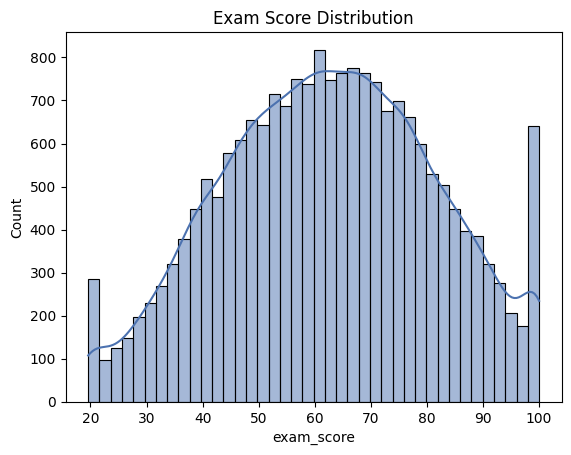

In [9]:
# Histplot
sns.histplot(df['exam_score'], kde=True, color="#4C72B0")
plt.title("Exam Score Distribution")
plt.show()

In [10]:
# Descriptive Analytics of Exam Score
print('Analysis of exam_score\n')
print('Median:\t\t', df['exam_score'].median())
print('Skewness:\t', df['exam_score'].skew())
print('Kurtosis:\t', df['exam_score'].kurt())
print(df['exam_score'].describe())

Analysis of exam_score

Median:		 62.6
Skewness:	 -0.04905862218606845
Kurtosis:	 -0.618423026475265
count    20000.000000
mean        62.513225
std         18.908491
min         19.599000
25%         48.800000
50%         62.600000
75%         76.300000
max        100.000000
Name: exam_score, dtype: float64


####Target Variable Key Insights  

Distribution Characteristics  
  
✅ Nearly Symmetric Distribution:
- Mean (62.51) ≈ Median (62.60) → Minimal skew
- Skewness = -0.048 (almost perfectly symmetric)
- Kurtosis = -0.619 (platykurtic - lighter tails than normal)

✅ Normality Assessment:
Distribution is practically normal for modeling purposes

Modeling Implications
- ✅ No transformation needed: Target is well-behaved and normal
- ✅ Standard metrics appropriate: RMSE, MAE, R² all valid
- ✅ Linear models viable: Normality assumption satisfied
- ✅ Full range coverage: No gaps or clusters requiring special treatment
- ⚠️ Slight negative skew: Model might slightly underpredict high scores

Visualizations provide an engaging way to understand our data. We will use a mix of histograms, count plots, pair plots, and a correlation heatmap. The variety of visualizations should unearth interesting relationships between features and the eventual exam score.

### Univariate Analysis

Analyze single variables (histograms for distributions, bar plots for counts)

<function matplotlib.pyplot.show(close=None, block=None)>

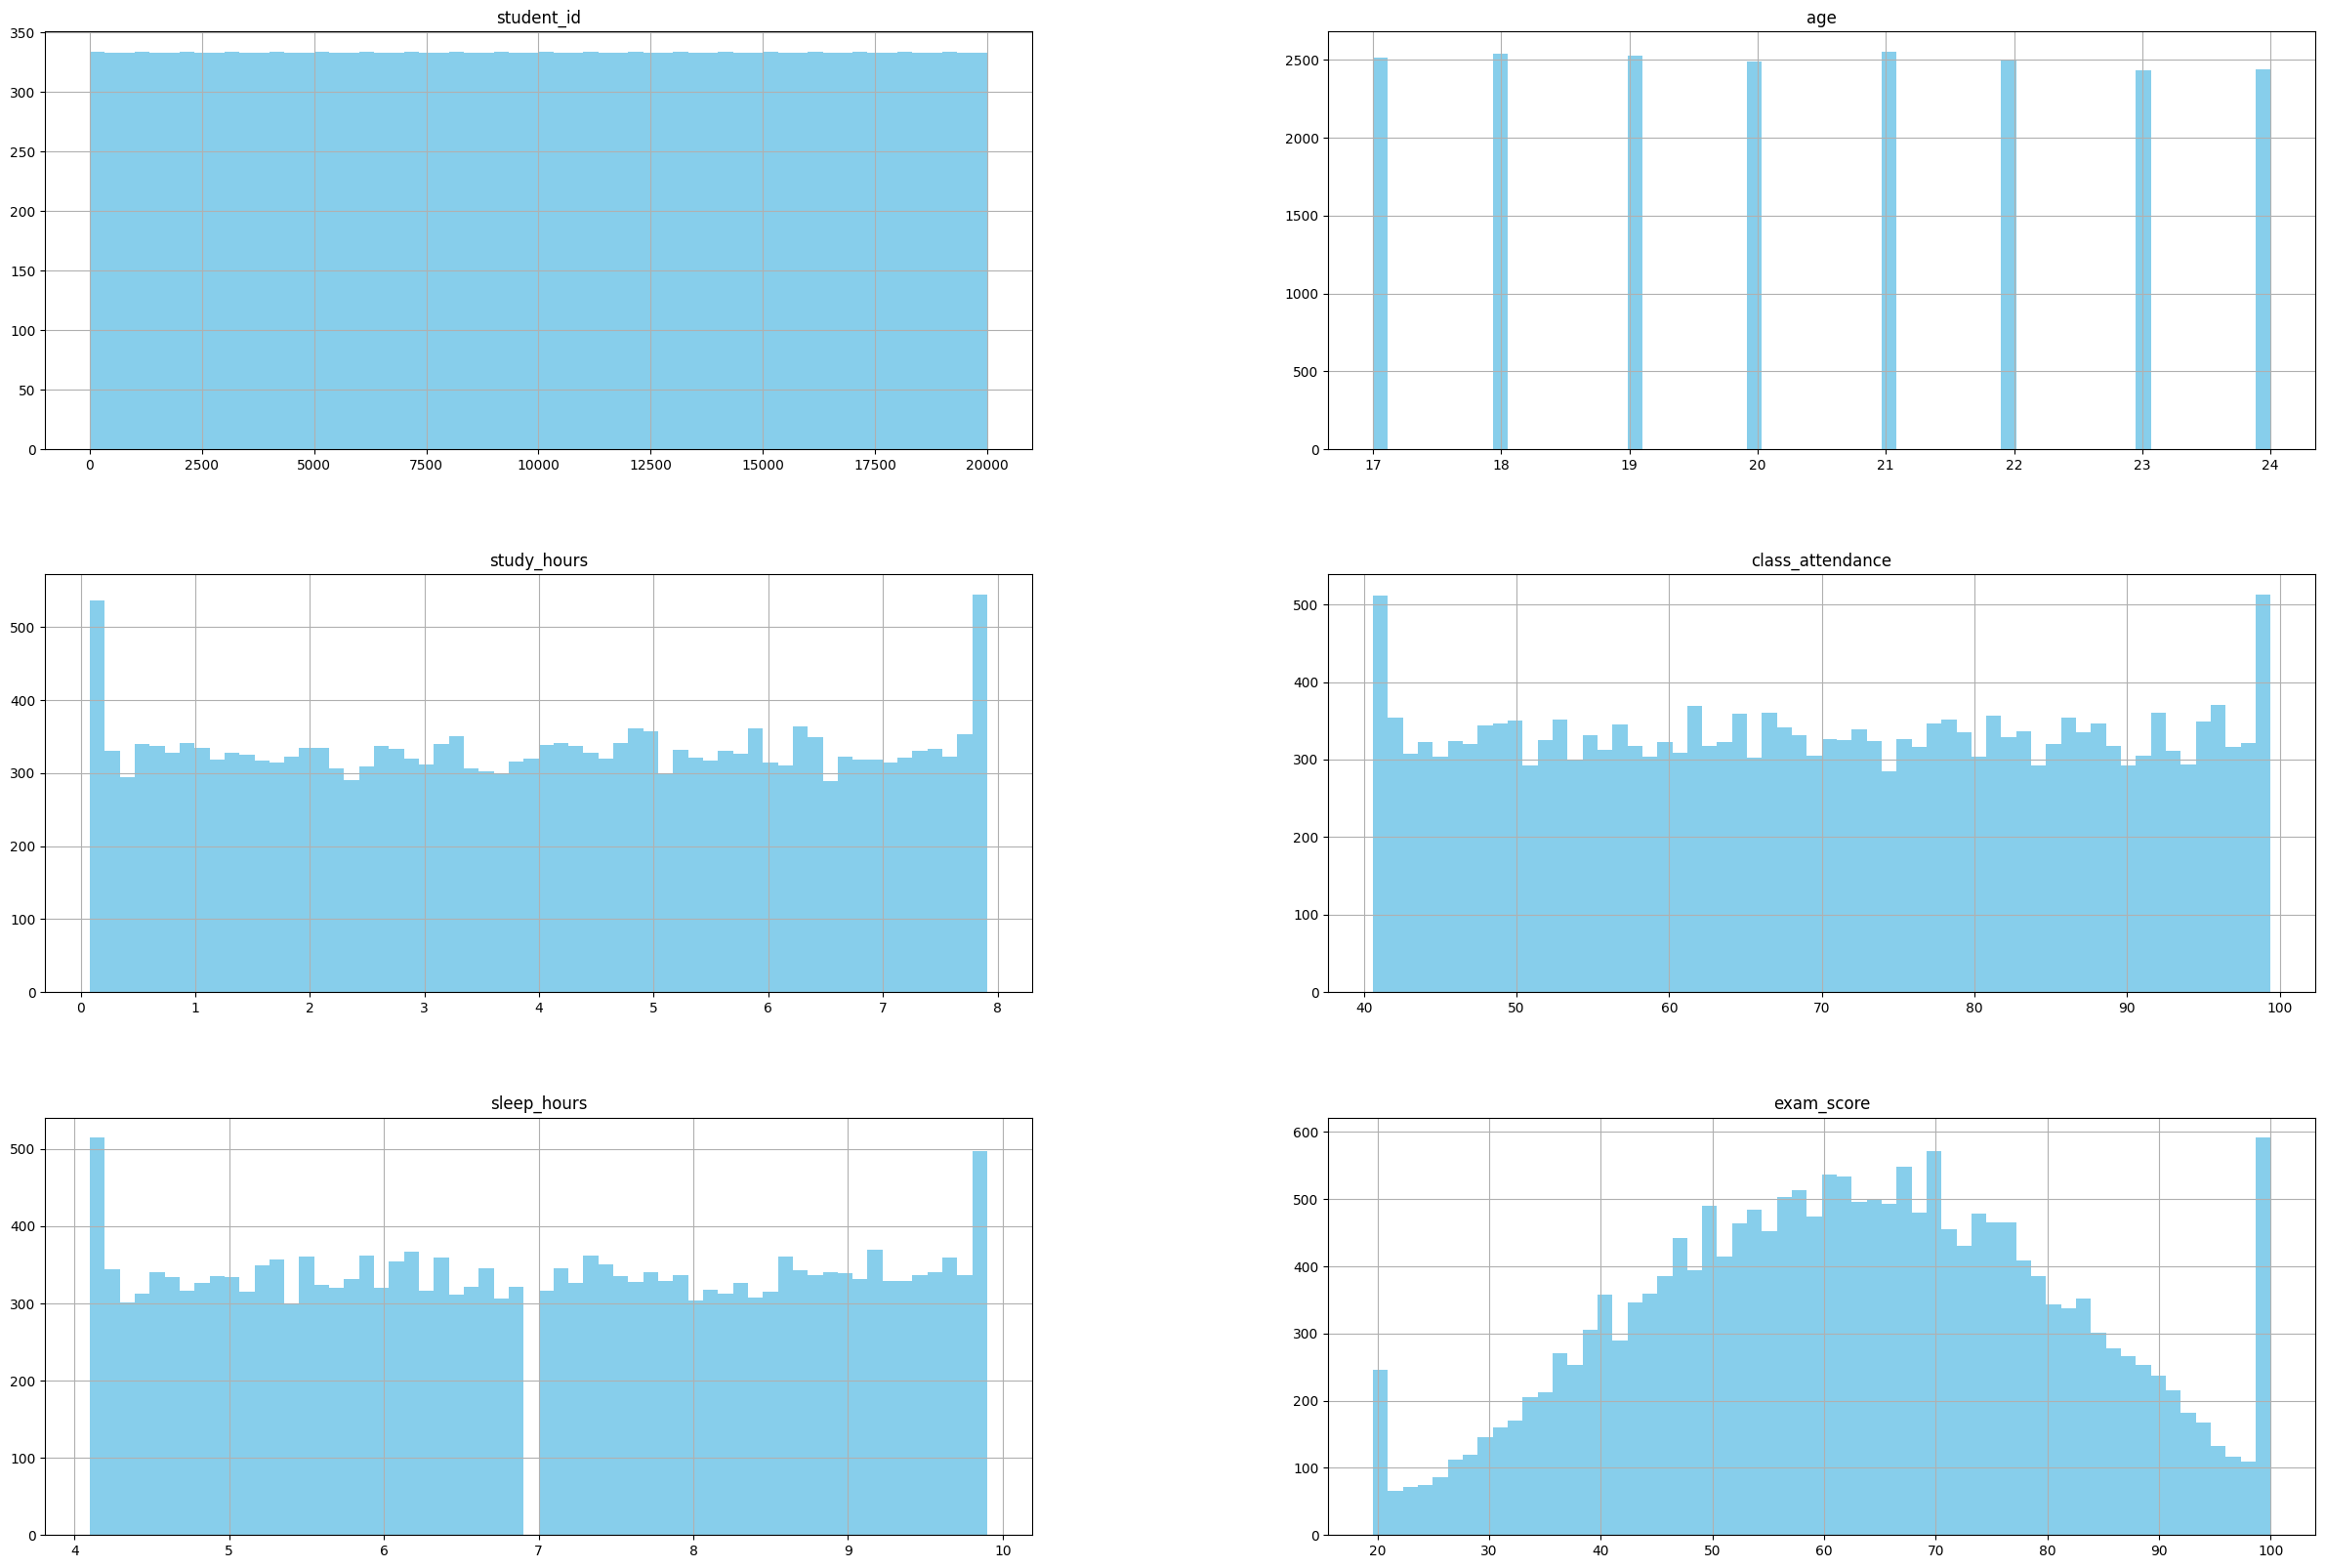

In [11]:
# Histograms
df.hist(bins=60,figsize=(30,20), color='skyblue')
plt.show

1.   **Student ID**. Distribution uniform and sequential, indicating that it functions purely as a unique identifier. It does not carry any intrinsic information about student behavior or performance.
2.   **Age**. The age distribution is discrete and fairly uniform across a narrow range (approximately 17-24 years). There is no dominant age group, and no extreme outliers are observed. The limited variability suggests age alone is unlikely to strongly explain performance differences, but age may still serve as a control variable in multivariate models.
3. **Study hours**. Study hours are approximately uniformly distributed across the observed range, indicating a wide diversity in student study behavior. No extreme skewness is present, though there are natural lower and upper bounds.
This wide spread makes study hours a strong candidate for explaining variability in exam scores. The lack of skew suggests models will not be dominated by a small subgroup of extreme soldiers. Supports the hypothesis that differences in preparation effort contribute significantly to performance differences.
4. **Class Attendance**. Class attendance is broadly distributed between roughly 40% and 100%, with no sharp concentration at a single level. This indicates heterogeneous engagement levels among students. Attendance shows sufficient variability to be useful in predictive modeling. However, the uniformity suggests attendance alone may not fully explain performance. Its value likely increases when combined with behavioral variables such as study hours.
5. **Sleep Hours**. Sleep hours are spread across a realistic range, with most students falling within typical sleep durations. The distribution appears relatively even, with no severe skew or extreme outliers. Adequate variability allows sleep hours to be tested as a potential contributor to academic performance. On its own, sleep may have a subtle effect, but it could interact with study hours or attendance. This supports including sleep hours as a secondary explanatory feature.
6. **Exam Score**. Exam scores follow an approximately bell-shaped distribution, centered around mid-range values. Extremely low and extremely high scores are less frequent, indicating that most students perform near the average. The near-normal distribution is suitable for regression-based models. Predicting extreme outcomes may be more difficult due to fewer observations. The spread confirms that meaningful performance differences exist and require explanation beyond random variation.

**Key Observations**
*   Behavioral variables (study hours, attendance, sleep) show meaningful variability
*   Demographic variables (age) have limited explanatory power on their own.
* The target variable (exam score) is well-distributed and appropiate for prediction tasks.

### Bivariate/Multivariate Analysis

Analyze relationships between numerical features.

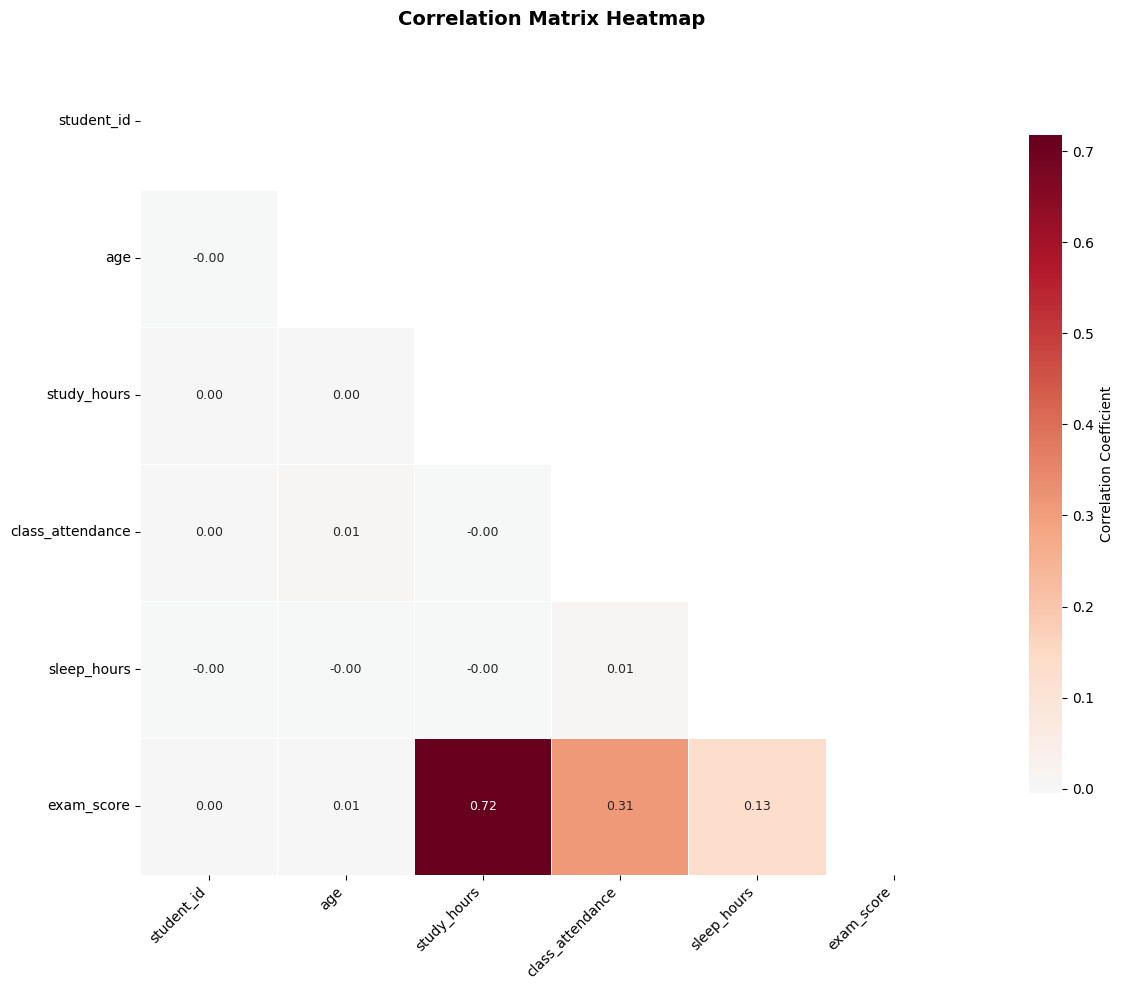

In [12]:
# Get numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) < 2:
    print("\n⚠️ Not enough numerical features for correlation analysis.")
else:
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # ============ Correlation Heatmap ============
    fig, ax = plt.subplots(figsize=(14, 10))

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, square=True, linewidths=0.5, ax=ax,
                cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
                annot_kws={'size': 9})

    ax.set_title('Correlation Matrix Heatmap', fontweight='bold', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [13]:
# Get all correlations as pairs
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Feature 1': corr_matrix.columns[i],
            'Feature 2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs Correlation', ascending=False)
corr_df.index = range(1, len(corr_df) + 1)

print("\n📊 Top 15 Feature Correlations:\n")
display(corr_df.head(15))


📊 Top 15 Feature Correlations:



,Feature 1,Feature 2,Correlation,Abs Correlation
1,study_hours,exam_score,0.717788,0.717788
2,class_attendance,exam_score,0.308850,0.308850
3,sleep_hours,exam_score,0.133222,0.133222
4,age,class_attendance,0.008449,0.008449
5,class_attendance,sleep_hours,0.007187,0.007187
6,age,exam_score,0.006522,0.006522
7,study_hours,sleep_hours,-0.004533,0.004533
8,student_id,exam_score,0.003269,0.003269
9,age,study_hours,0.002955,0.002955
10,student_id,age,-0.002574,0.002574


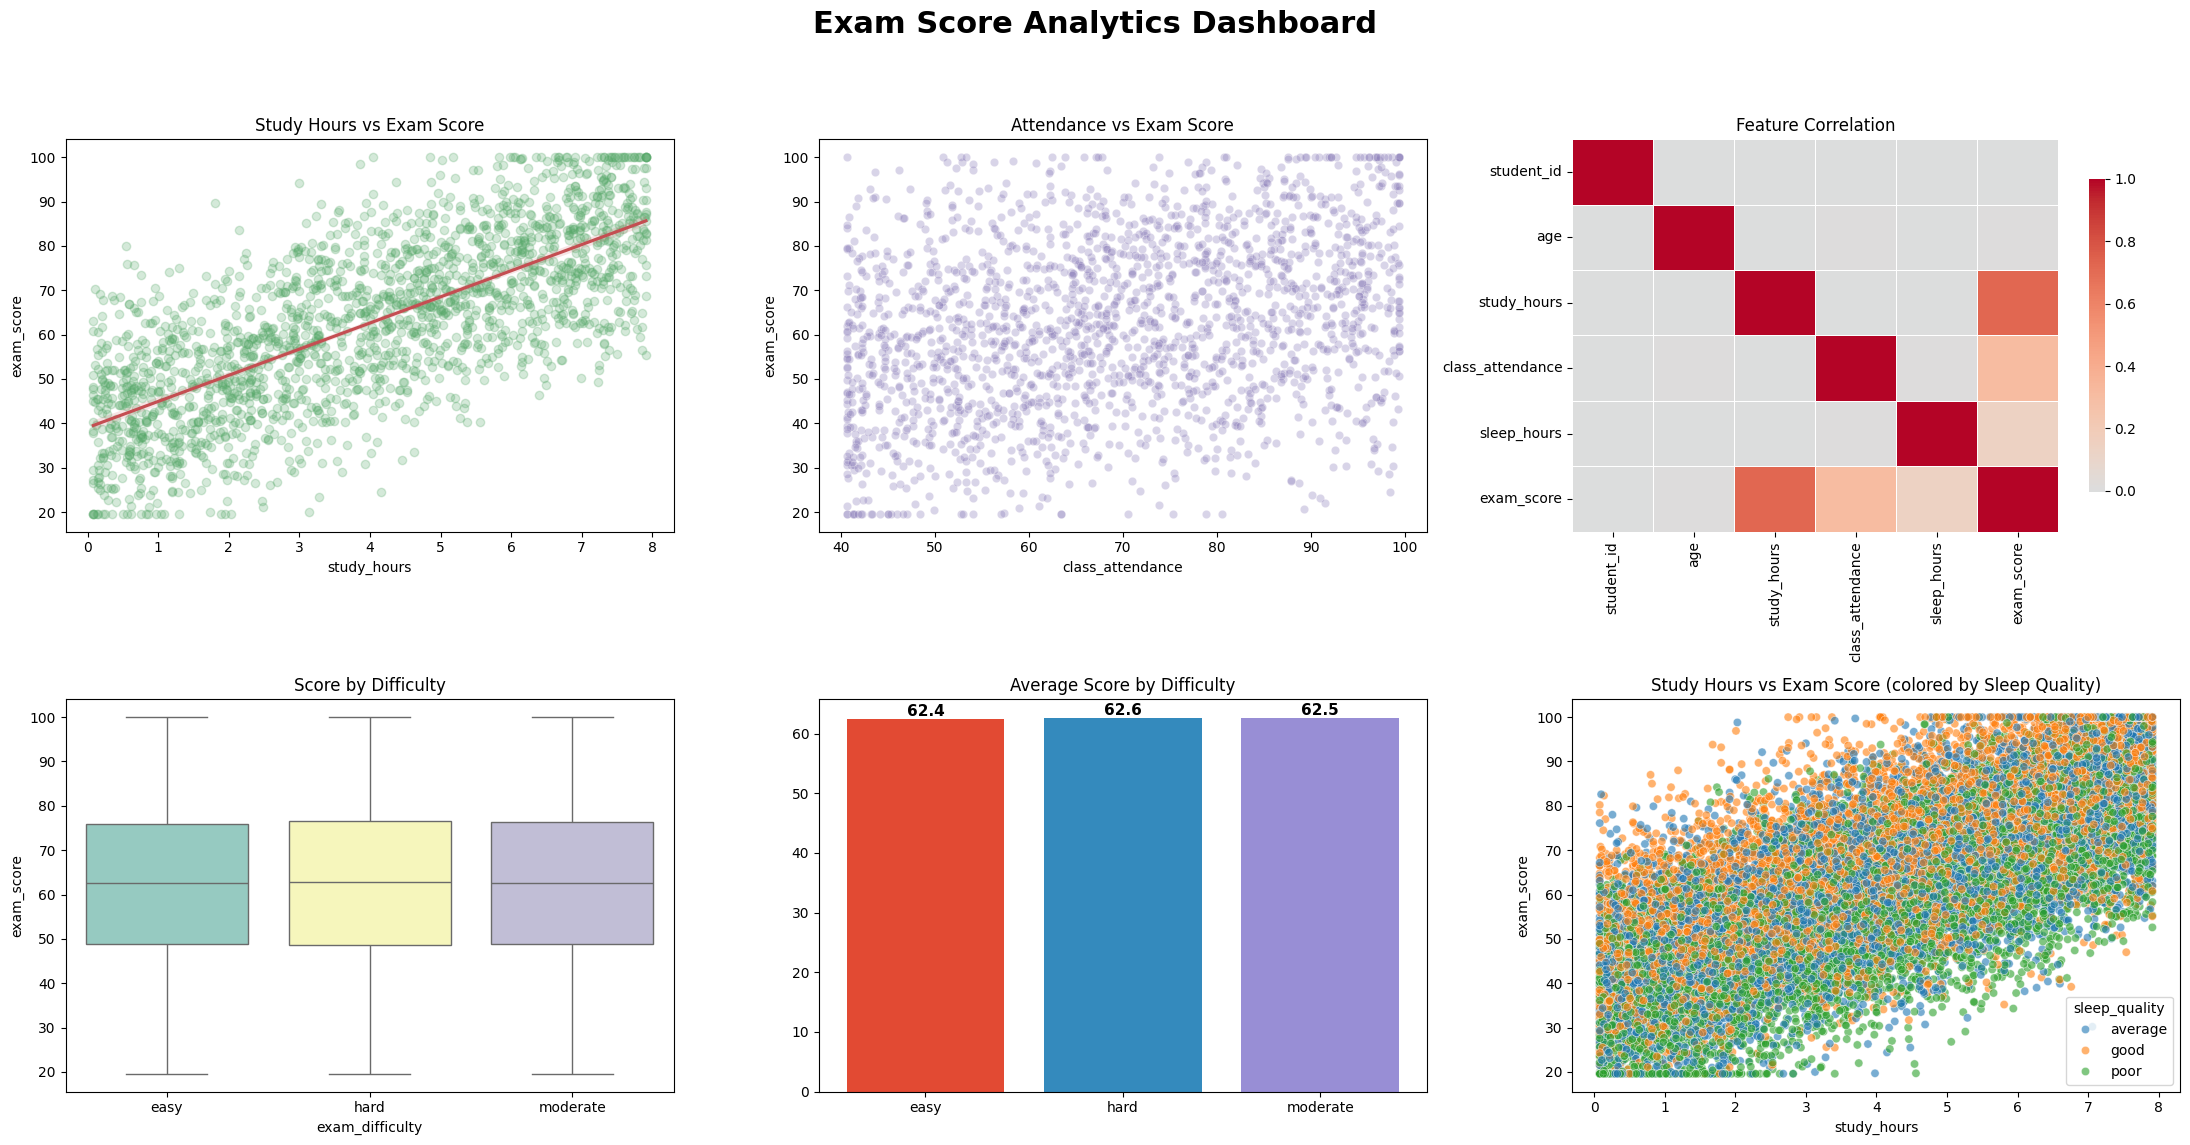

In [14]:
# Plot relationships between exam score (target variable) and different variables

def perform_eda(df):
    fig, axes = plt.subplots(2, 3, figsize=(22, 12))
    fig.suptitle("Exam Score Analytics Dashboard", fontsize=22, fontweight="bold")

# Scatter Plot - Study Hours vs Exam Score
    sns.regplot(
        data=df.sample(min(2000, len(df))),
        x='study_hours',
        y='exam_score',
        scatter_kws={'alpha': 0.25, 'color': "#55A868"},
        line_kws={'color': "#C44E52"},
        ax=axes[0, 0]
    )
    axes[0, 0].set_title("Study Hours vs Exam Score")

# Scatter Plot - Attendance vs Exam Score
    sns.scatterplot(
        data=df.sample(min(2000, len(df))),
        x='class_attendance',
        y='exam_score',
        alpha=0.3,
        color="#8172B3",
        ax=axes[0, 1]
    )
    axes[0, 1].set_title("Attendance vs Exam Score")

# Feature Correlation Heatmap
    corr = df.select_dtypes(include=np.number).corr()
    sns.heatmap(
        corr, cmap="coolwarm", center=0,
        linewidths=0.5, cbar_kws={'shrink': 0.8},
        ax=axes[0, 2]
    )
    axes[0, 2].set_title("Feature Correlation")

# Boxplot - Exam Score by Difficulty
    sns.boxplot(
        data=df, x="exam_difficulty", y="exam_score",
        palette="Set3", ax=axes[1, 0]
    )
    axes[1, 0].set_title("Score by Difficulty")

    mean_scores = df.groupby("exam_difficulty")["exam_score"].mean()
    bars = axes[1, 1].bar(
        mean_scores.index,
        mean_scores.values,
        color=["#E24A33", "#348ABD", "#988ED5"]
    )
    axes[1, 1].set_title("Average Score by Difficulty")

# Bar chart - Average Score by Difficulty
    for bar in bars:
        axes[1, 1].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f"{bar.get_height():.1f}",
            ha="center", fontsize=11, fontweight="bold"
        )

    # Scatter Plot - Study Hours vs Exam Score (colored by Sleep Quality)
    sns.scatterplot(
        x='study_hours',
        y='exam_score',
        hue='sleep_quality',
        data=df,
        alpha=0.6,
        ax=axes[1, 2]
      )
    axes[1,2].set_title('Study Hours vs Exam Score (colored by Sleep Quality)')

    for ax in axes.flat:
        ax.grid(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.94])
    plt.show()

perform_eda(df)

1.   **Exam Score Distribution (Histogram)**  
The distribution of exam scores appears approximately normal, centered around the mid-60s range, with fewer students at the extreme low and high ends. This suggest that most students perform at an average level, while very high or very low performance is less common.

2.   **Study Hours vs Exam Score (Scatter Plot with Trend Line)**  
There is a clear positive relationship between study hours and exam score. As study hours increase, exam score tend to rise. However, the dispersion increases at higher study hours, suggesting diminishing returns and individual variability.  
*Connection to problem questions:* Study hours are a strong and actionable predictor of academic performance. The diminishing returns indicate that studying more does not guarantee proportionally higher scores for all students, but the relationship supports using study hours as a key feature in predictive models, while also considering interactions with other variables.

3.   **Attendance vs Exam Score (Scatter Plot with Trend Line)**  
Attendance shows a weak to moderate positive relationship with exam scores. Higher attendance is generally associated with better performance, but there is substantial variability across all attendance levels.  
*Connection to problem questions:* Attendance alone is not a sufficient predictor of exam performance. Students with high attendance can still underperform, suggesting other factors (study habits, sleep, exam difficulty) play a role. Attendance may be more valuable when combined with other features rather than used independently.

4.   **Feature Correlation Heatmap**  
The heatmap shows that
*   Study hours have the strongest positive correlation with exam score
*   Sleep hours and attendance have weaker correlations with performance
*   Age shows little to no correlation with exam score
*   No extreme multicollineary is present among predictors  
*Connection to problem questions:* This graph confirms study hours as the most influential feature, it supports the use of multiple features rather than relying on a single variable, and low multicollinearity suggests that regression-based models are appropiate and stable.

5.   **Exam Score by Difficulty (Boxplot)**
Score distributions across difficulty levels (easy, moderate, hard) are relatively similar, with overlapping interquartile ranges. While harder exams show slightly lower medians, the differences are not drastic.  
*Connection to problem questions:* Exam difficulty alone does not strongly determine student performance. Individual characteristics and behaviours appear to outweigh exam-level factors. Difficulty may act as a moderating variable rather than a primary driver of outcomes.

6.   **Average Score by Difficulty (Bar Chart)**  
Average scores across difficulty levels are very close (approximately 62-63), indicating minimal differences in mean performance between easy, moderate, and hard exams.  
*Connection to problem questions:* Reinforces that exam difficulty is not a dominant factor in explaining score variation. Suggests that students adapt their effort or preparation level to perceived difficulty. Difficulty adds limited predictive power on its own but may still improve model performance when combined with other features.


###Key Insights

####Key Findings

*   **Study hours** are the strongest and most actionable predictor of exam performance. This is the #1 actionable variable for students. Models should give this feature high weight
*   **Attendance** contribute modestly but do not independently explain outcomes. It's worth to create an interaction feature between `study_hours * attendance`, given their synergistic effect.
*   **Exam difficulty and sleep** have limited explanatory power compared to student behavior. sleep_quality (categorical) may be more informative.
*   **Performance variability** suggests the need for multivariate and possibly non-linear models.

Student behavior - particularly study time - plays a more significant role in exam performance than demographic or exam-level characteristics. Predictive models should therefore prioritize behavioral features while using contextual variables to refine predictions and reduce error.

####**Implications**

*   Early identification of students with low study hours could help flag students at risk
*   Demographics and exam difficulty play minimal roles. Interventions should focus on improving study habits rather than solely increasing attendance or adjusting exam difficulty.
*   Predictive models can support targeted academic support rather than blanket policies.

**Model Implications**
* Tree-based models (LightGBM / CatBoost) are ideal
* Interaction features add significant value
* Clip predictions to observed bounds

### Categorical Features Analysis


    gender:
      Unique values: 3
      Values: ['male', 'other', 'female']
Categories (3, object): ['female', 'male', 'other']...

    course:
      Unique values: 7
      Values: ['diploma', 'bca', 'b.sc', 'b.tech', 'bba', 'ba', 'b.com']
Categories (7, object): ['b.com', 'b.sc', 'b.tech', 'ba', 'bba', 'bca', 'diploma']...

    internet_access:
      Unique values: 2
      Values: ['yes', 'no']
Categories (2, object): ['no', 'yes']...

    sleep_quality:
      Unique values: 3
      Values: ['poor', 'average', 'good']
Categories (3, object): ['average', 'good', 'poor']...

    study_method:
      Unique values: 5
      Values: ['coaching', 'online videos', 'mixed', 'self-study', 'group study']
Categories (5, object): ['coaching', 'group study', 'mixed', 'online videos', 'self-study']...

    facility_rating:
      Unique values: 3
      Values: ['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']...

    exam_difficulty:
      Unique values: 3
      Values: ['

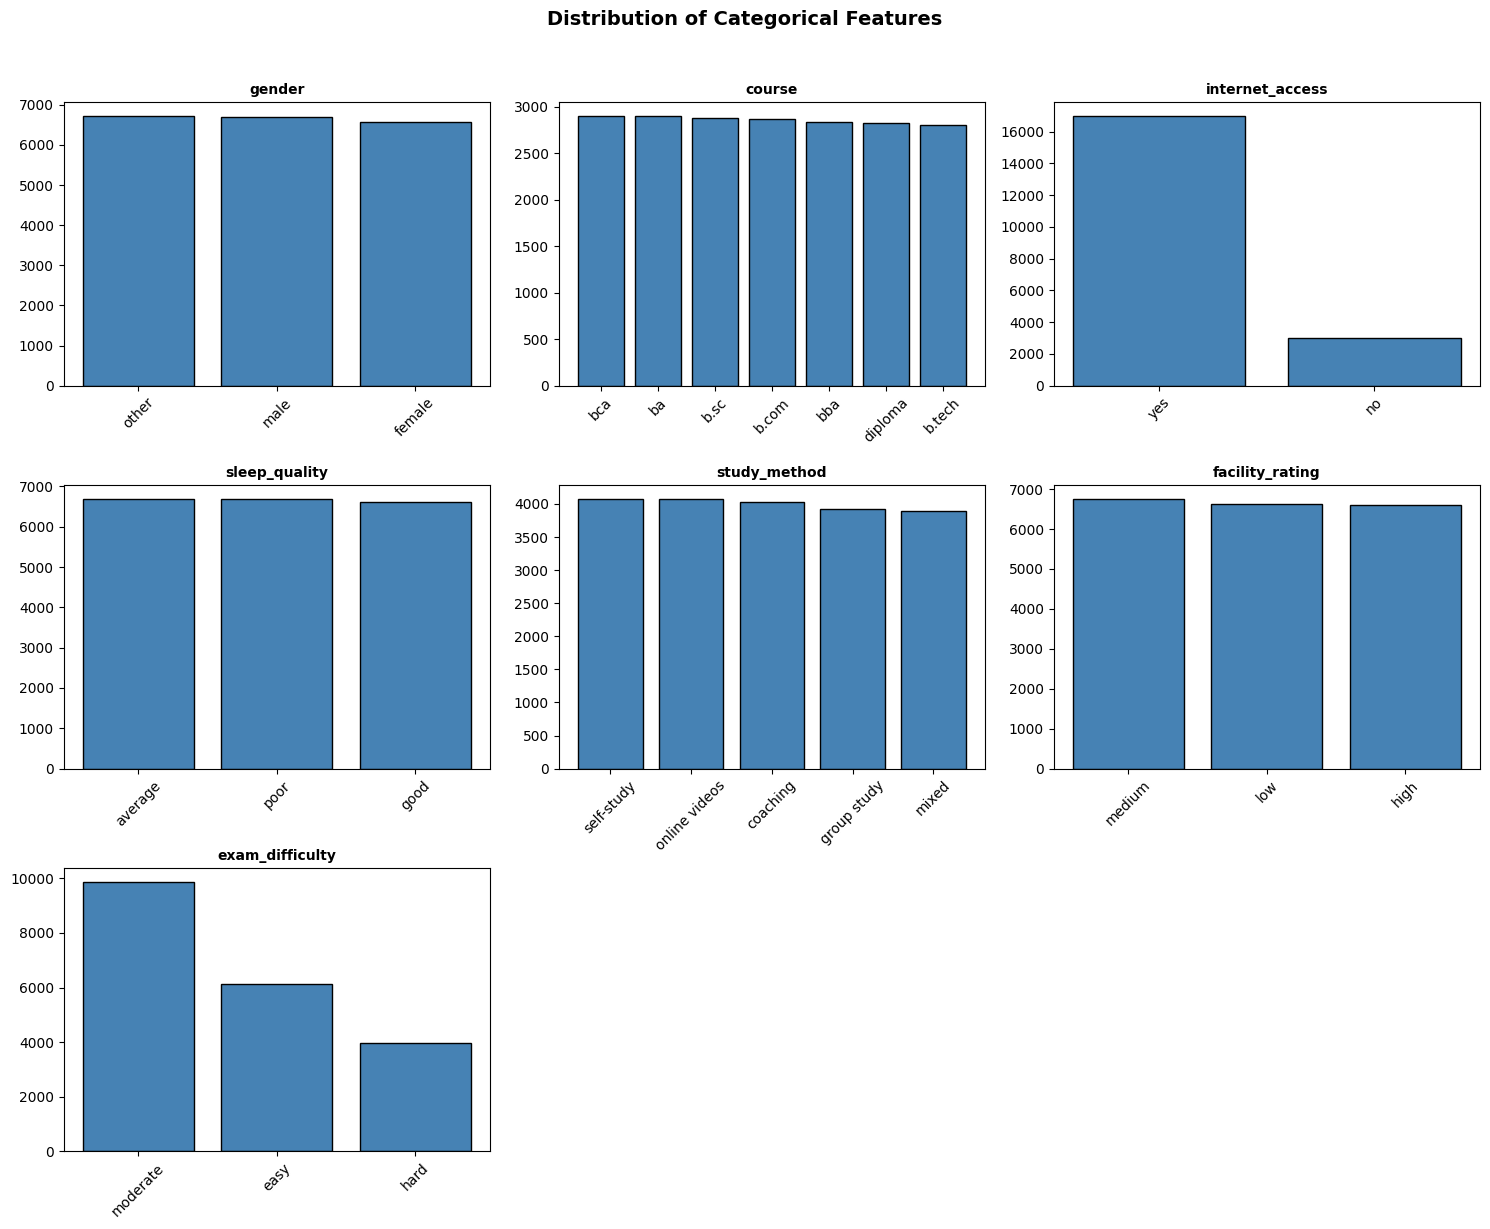

In [15]:
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n    {col}:")
        print(f"      Unique values: {df[col].nunique()}")
        print(f"      Values: {df[col].unique()[:10]}...")  # Show first 10

    # Visualize categorical distributions
    n_cats = len(categorical_cols)
    n_cols_plot = min(3, n_cats)
    n_rows_plot = (n_cats + n_cols_plot - 1) // n_cols_plot

    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
    if n_cats == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for idx, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        axes[idx].bar(value_counts.index.astype(str), value_counts.values, color='steelblue', edgecolor='black')
        axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[idx].tick_params(axis='x', rotation=45)

    # Hide empty subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle('Distribution of Categorical Features', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('categorical_distributions.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("   No categorical features found!")

##🛠️ Feature Engineering & Selection

###🧹 Drop ID column

In [16]:
# Drop ID column (it's an identifier, not a feature)
df = df.drop(columns=["student_id"])

`Student ID` is an identifier, it doesn't have predictive value, so it must be removed.

###✂️ Split & Test-Train

**Data Splitting Strategy**:  
Separate dataset into training (60%), validation (20%) and test (20%) sets.
Preprocessing steps were fitted exclusively on the training data to prevent data leakage and ensure an unbiased evaluation of model performance.

In [17]:
# Split the data
target_col = "exam_score"
X = df.drop(columns=[target_col])
y = df[target_col]

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

print(f"   Training set:  {X_train.shape}")
print(f"   Test set:  {X_test.shape}")
print(f"   Validation set:  {X_val.shape}")

   Training set:  (12000, 11)
   Test set:  (4000, 11)
   Validation set:  (4000, 11)


###🔧 Encoding

In [39]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove("exam_score")

ordinal_features = ["sleep_quality", "facility_rating", "exam_difficulty"]
ordinal_categories = [
    ["poor", "average", "good"],
    ["low", "medium", "high"],
    ["easy", "moderate", "hard"],
]

nominal_features = ["gender", "course", "study_method", "internet_access"]

print(f"🔢 Numerical Features ({len(numeric_features)}): {numeric_features}")
print(f"🔢 Ordinal Features ({len(ordinal_features)}): {ordinal_features}")
print(f"🔢 Nominal Features ({len(nominal_features)}): {nominal_features}")

🔢 Numerical Features (4): ['age', 'study_hours', 'class_attendance', 'sleep_hours']
🔢 Ordinal Features (3): ['sleep_quality', 'facility_rating', 'exam_difficulty']
🔢 Nominal Features (4): ['gender', 'course', 'study_method', 'internet_access']


In [40]:
# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ("nom", OneHotEncoder(handle_unknown="ignore"), nominal_features)
    ],
    remainder="drop"
)

In [41]:
# Fit on training data only (to prevent data leakage)
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("X train shape:", X_train_processed.shape, y_train.shape)
print("X val shape:", X_val_processed.shape, y_val.shape)

# Get feature names after preprocessing
num_feature_names = numerical_features
ord_feature_names = preprocessor.named_transformers_['ord'].get_feature_names_out(ordinal_features).tolist()
all_feature_names = num_feature_names + ord_feature_names

print(f"\n📋 All Feature Names After Encoding:")
for i, name in enumerate(all_feature_names, 1):
    print(f"   {i:2d}. {name}")

X train shape: (12000, 24) (12000,)
X val shape: (4000, 24) (4000,)

📋 All Feature Names After Encoding:
    1. student_id
    2. age
    3. study_hours
    4. class_attendance
    5. sleep_hours
    6. sleep_quality
    7. facility_rating
    8. exam_difficulty


###Scaling

Scaling helps certain algorithms (Linear, SVM, KNN).  
Tree-based models (XGBoost, LightGBM, CatBoost) don't need it.

##🤖 Model Development

##### Task: Regression

The problem requires a **regression** task because the **target variable** (`exam_score`) is **continuous**. This also enables fine-grained performance evaluation using regression metrics (MAE, RMSE, R2).


####💪 Model Training

In [42]:
# Regression Models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10,
                                            random_state=42, n_jobs=-1),

    # Gradient Boosting Models
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                            random_state=42, n_jobs=-1, verbosity=0,
                            subsample=0.8, colsample_by_tree=0.8,
                            enable_categorical=True, tree_method='hist'),
    'LightGBM': LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1,
                              random_state=42, n_jobs=-1, verbose=-1),

    # Other Models
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
}
print(f"🤖 Total models to evaluate: {len(models)}")

🤖 Total models to evaluate: 5


####✅️ Model Evaluation

#####Model Metrics

In [56]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    #Train model and return metrics
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    return rmse, mae, r2, y_pred

results = []


for name, model in models.items():
    print(f"   Training {name}...", end=" ")
    try:
        pipeline = Pipeline([
              ("preprocessing", preprocessor),
              ("model", model)
              ])

        # Fit on Train data only (no leakage)
        pipeline.fit(X_train, y_train)

        #Predict on TEST - this goes way below
        y_pred = pipeline.predict(X_val)

        rmse, mae, r2, _ = evaluate_model(model, X_train_processed,
                                          X_val_processed, y_train, y_val)
        results.append({
            'Model': name,
            'RMSE':  rmse,
            'MAE': mae,
            'R2': r2,
            'Pipeline': pipeline
        })
        print(f"RMSE: {rmse:.4f}")
    except Exception as e:
        print(f"Error:  {e}")

   Training Linear Regression... RMSE: 9.7213
   Training Random Forest... RMSE: 10.1320
   Training XGBoost... RMSE: 10.0194
   Training LightGBM... RMSE: 9.9157
   Training KNN... RMSE: 11.4993



 MODEL COMPARISON (sorted by RMSE - lower is better):
            Model      RMSE      MAE       R2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

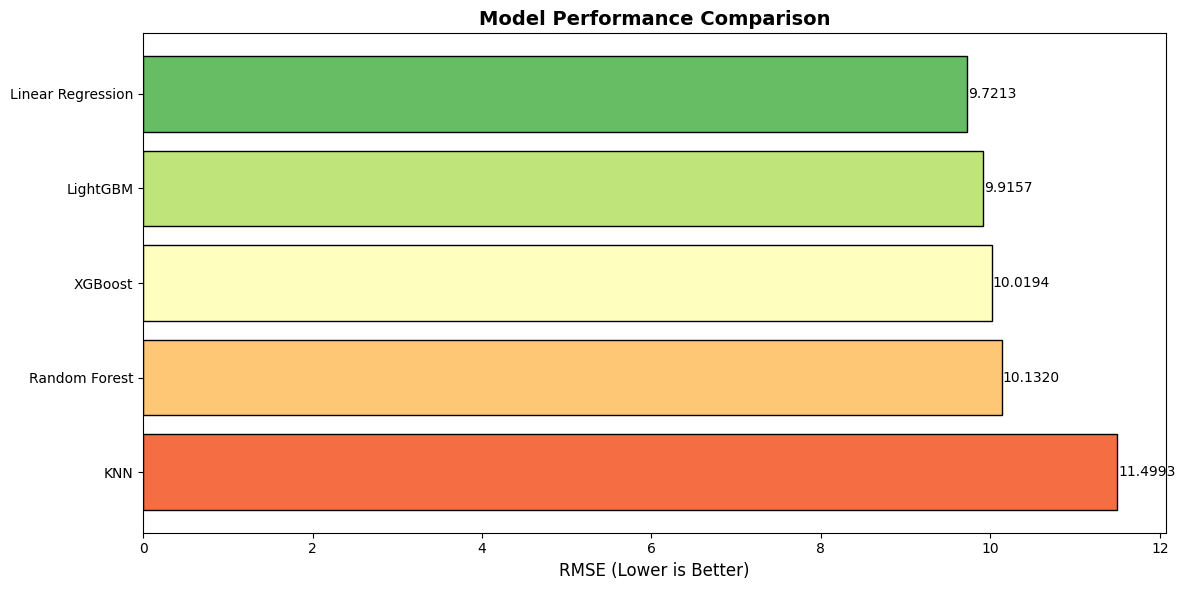

In [57]:
# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('RMSE', ascending=True)
print("\n MODEL COMPARISON (sorted by RMSE - lower is better):")

print(results_df.to_string(index=False))

# Visualize results
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(results_df)))
bars = ax.barh(results_df['Model'], results_df['RMSE'], color=colors, edgecolor='black')
ax.set_xlabel('RMSE (Lower is Better)', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for bar, rmse in zip(bars, results_df['RMSE']):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
            f'{rmse:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

#####🥇 Model Selected: Linear Regression

**Linear Regression**. Although tree-based models were tested, Linear Regression achieved the best performance across RMSE and R2, providing a good trade-off between accuracy and interpretability.

#####Residual Analysis

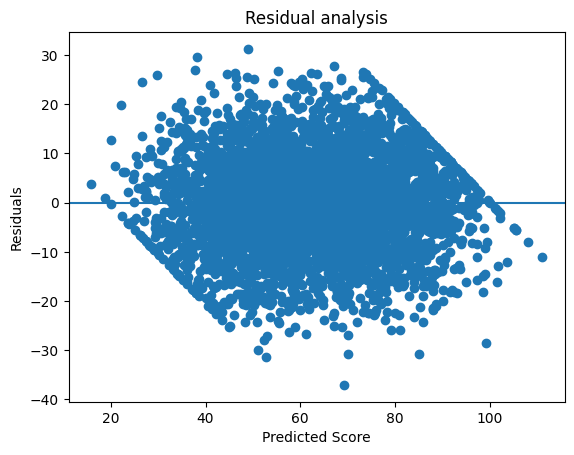

In [63]:
residuals = y_test - y_pred_test

plt.scatter(y_pred_test, residuals)
plt.axhline(0)
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.title("Residual analysis")
plt.show()

Residuals are approximately centered around zero with increased dispersion at extreme predicted values, indicating mild heteroscedasticity and suggesting potential nonlinear effects not captured by the linear model.

---

The residuals are centered around zero, indicating no strong systematic bias in predictions.  
However, a slight increase in variance is observerd for extreme predicted scores, suggesting mild heteroscedasticity.  
This behavior is expected in linear regression models applied to bounded targets such as exam scores and indicates reduced accuracy for extreme cases.  
Overall, the residual distribution supports the adequacy of the model while highlighting its limited ability to capture nonlinear patterns.

#####Predicted vs Actual

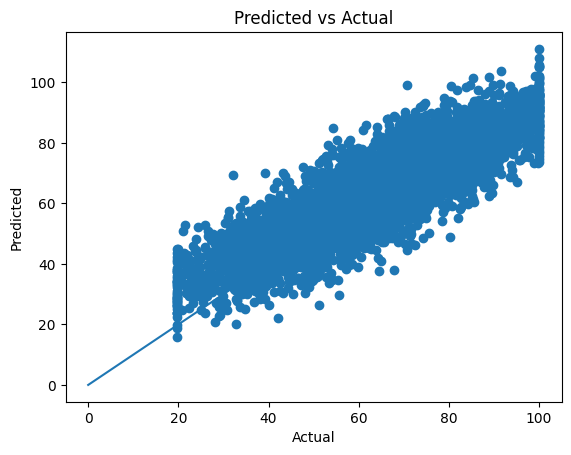

In [64]:
plt.scatter(y_test, y_pred_test)
plt.plot([0,100], [0,100])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

The predicted vs actual plot shows a strong linear relationship, indicating good overall predictive performance.  
However, predictions tend to be compressed toward the mean, with slight overestimation of low scores and underestimation of high scores.
This behavior is expected in linear regression models and suggests potential benefits from nonlinear approaches.  
Tree-based models were explored to address these limitations, though linear regression was selected for its interpretability.

##✅️ Model Predictions

In [62]:
# Train models
best_row = results_df.sort_values("RMSE").iloc[0]
best_model = best_row["Pipeline"]

y_pred_test = best_model.predict(X_test)

rmse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)
print("Test R2:", r2_test)

Test RMSE: 95.45361316962759
Test MAE: 7.858384957135796
Test R2: 0.733143950287487


The model generalizes well to unseen data, achieving a strong R2 score and low prediction error relative to the target scale.

##💡 Actionable Recommendations

For Students (Real-World)
1. **Priority #1**: Increase study hours (biggest ROI)
2. **Priority #2**: Maintain 80%+ attendance
3. **Priority #3**: Aim for 7-8 hours sleep
4. Age doesn't matter - focus on behaviors!

##🧠 Conclusions

This project demonstrates a complete supervised regression pipeline, including preprocessing, feature encoding, model selection and evaluation.  
Tree-based ensemble models achieved the best performance, with an R2 of 0.73 and low prediction error.  
The results highlight the importance of behavioral features such as study hours, attendance and sleep quality in exam performance.